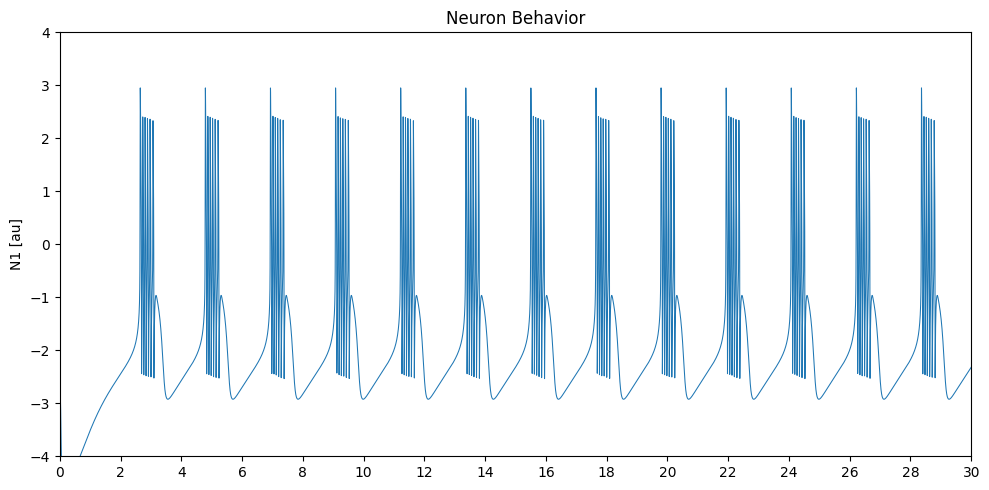

In [46]:
# Single Neuron Code
import numpy as np, matplotlib.pyplot as plt

tmax=int(30000)
h = 1
t=np.arange(0, tmax, h)

# Iapp
Iapp = np.array([-1.825])

### Neurons parameters ###
# [af-,as+,as-,aus+]
alpha=np.array([-2,2,-1.5,1.5])
# [df-,ds+,ds-,dus+]
delta=np.array([0,0,-1.5,-1.5])


def vm(Si):
    vmi, vfi, vsi, vusi = Si
    Isyn1=Iapp[0]
    return -vmi-alpha[0]*\
            np.tanh(vfi-delta[0])\
            -alpha[1]*np.tanh(vsi-delta[1])\
            -alpha[2]*np.tanh(vsi-delta[2])\
            -alpha[3]*np.tanh(vusi-delta[3])+Isyn1

def vf(Si):
    vmi, vfi, vsi, vusi = Si
    return vmi-vfi

def vs(Si):
    vmi, vfi, vsi, vusi = Si
    return (vmi-vsi)*0.01953125

def vus(Si):
    vmi, vfi, vsi, vusi = Si
    return (vmi-vusi)*0.0004

def dsdt(t, S):
    return np.array([vm(S), vf(S), vs(S), vus(S)])

def euler(tmax, S0, h=1):
    S = np.zeros([int(tmax/h), len(S0)])
    S[0] = S0
    i = 0
    t = 0
    while t < tmax-1:
        t += h
        S[i+1] = S[i] + h*dsdt(0, S[i])
        i += 1
    return S

vm1_0, vf1_0, vs1_0, vus1_0 = -1.,0.,0.,0.

S_0 = (vm1_0, vf1_0, vs1_0, vus1_0)

sol_m1 = euler(tmax, S_0, h)
S = np.array((sol_m1))

# print(np.min(S, axis=0), np.max(np.abs(S), axis=0))
# Voltages
vm1 = sol_m1.T[0]
vf1 = sol_m1.T[1]
vs1 = sol_m1.T[2]
vus1 =sol_m1.T[3]
# print(sol_m1)
# Iapp
I1=Iapp[0]

### Plot ###
plt.figure(figsize=(10,5), tight_layout=True)
# N1 Blue
plt.title("Neuron Behavior")
plt.plot(t,vm1,lw=.75)
plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.ylabel("N1 [au]")

plt.show()

In [20]:
print(vm1[0:10])

[-1.         -1.0825     -1.17634493 -1.2796446  -1.39061967 -1.50755889
 -1.62878808 -1.75265865 -1.8775579  -2.00193781]


In [14]:
def normalize(x, newRange=(0, 1)):
    xmin, xmax = np.min(x), np.max(x)
    norm = (x - xmin)/(xmax - xmin)

    return norm * (newRange[1] - newRange[0]) + newRange[0]

In [25]:
print(normalize([0.00027506, 1], (-pow(2,14), pow(2,14))))

[-16384.  16384.]


[-4.6000859  -4.6000859  -4.50071204 -1.91719538] [4.6000859  4.6000859  4.50071204 1.91719538]


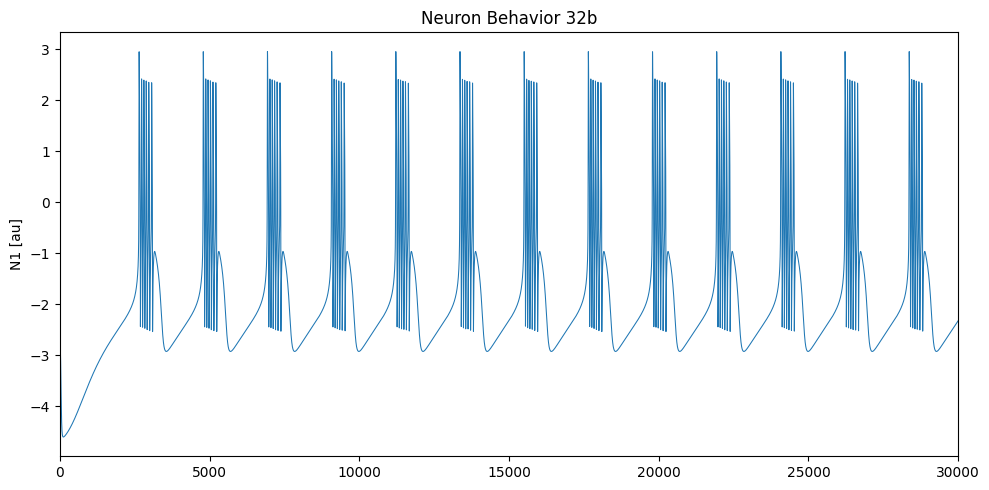

In [43]:
# this is mostly the same code as above, however i modified the vus function to compute in fixed-point arithmetic
# you can ignore it, however if you wanted to look at it you can

import numpy as np, matplotlib.pyplot as plt
from fxpmath import Fxp
boost = 1
tmax=int(30E3)
h = 1
t=np.arange(0, tmax, h)
n = 32
f = 24

# Iapp
Iapp = np.array([-1.825])*boost

### Neurons parameters ###
# [af-,as+,as-,aus+]
alpha=np.array([-2,2,-1.5,1.5])*boost
# [df-,ds+,ds-,dus+]
delta=np.array([0,0,-1.5,-1.5])*boost


def vm(Si):
    vmi, vfi, vsi, vusi = Si
    Isyn1=Iapp[0]
    return -vmi-alpha[0]*\
            np.tanh(vfi-delta[0])\
            -alpha[1]*np.tanh(vsi-delta[1])\
            -alpha[2]*np.tanh(vsi-delta[2])\
            -alpha[3]*np.tanh(vusi-delta[3])+Isyn1

def vf(Si):
    vmi, vfi, vsi, vusi = Si
    return vmi-vfi

def vs(Si):
    vmi, vfi, vsi, vusi = Si
    return (vmi-vsi)*0.01953125

def vus(Si):
    vmi, vfi, vsi, vusi = Si
    vmi = Fxp(vmi, signed=True, n_word=n, n_frac=f)
    vusi = Fxp(vusi, signed=True, n_word=n, n_frac=f)
    vuso = Fxp(None, signed=True, n_word=n, n_frac=f)
    vuso.equal((vmi-vusi)*Fxp(.0004, signed=True, n_word=n, n_frac=f))
    # print(type(vuso.astype(float)))
    return vuso.astype(float)[0]

def dsdt(t, S):
    return np.array([vm(S), vf(S), vs(S), vus(S)])

def euler(tmax, S0, h=1):
    S = np.zeros([int(tmax/h), len(S0)])
    S[0] = S0
    i = 0
    t = 0
    while t < tmax-1:
        t += h
        S[i+1] = S[i] + h*dsdt(0, S[i])
        i += 1
    return S

vm1_0, vf1_0, vs1_0, vus1_0 = -1.*boost,0.,0.,0.

S_0 = (vm1_0, vf1_0, vs1_0, vus1_0)

sol_m1 = euler(tmax, S_0, h)
S = np.array((sol_m1))

print(np.min(S, axis=0), np.max(np.abs(S), axis=0))
# Voltages
vm1 = sol_m1.T[0]
vf1 = sol_m1.T[1]
vs1 = sol_m1.T[2]
vus1 =sol_m1.T[3]
# print(sol_m1)
# Iapp
I1=Iapp[0]

### Plot ###
plt.figure(figsize=(10,5), tight_layout=True)
# N1 Blue
plt.title("Neuron Behavior 32b")
plt.plot(t,vm1,lw=.75)
plt.xlim(0,tmax)
# plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
# plt.ylim(-4,4)
plt.ylabel("N1 [au]")
plt.savefig("output_files/N32")
plt.show()